## Problem Statement

Through early identification of at-risk kids and customized treatments, BrightPath Academy is working to enhance academic support.  However, pupils' academic potential is at risk because of delayed identification, ambiguous extracurricular impact, and data saturation without actionable insights.  The goal of this project is to develop a predictive model that uses demographics, study habits, parental participation, and extracurricular activities to categorize students' academic achievement (GradeClass).

## Hypothesis

Academic achievement is favourably correlated with greater parental support.

## Loading the Data

In [2]:
%pip install seaborn
%pip install xgboost


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, f1_score, mean_squared_error, r2_score

df = pd.read_csv('Student_performance_data.csv')

display(df.head())

print("Data Info:")
display(df.info())
print("\nNull Values:")
display(df.isnull().sum())

df = df.dropna()

,StudentID,Age,Gender,Ethnicity,ParentalEducation,StudyTimeWeekly,Absences,Tutoring,ParentalSupport,Extracurricular,Sports,Music,Volunteering,GPA,GradeClass
0,1001,17,1,0,2,19.833723,7,1,2,0,0,1,0,2.929196,2.0
1,1002,18,0,0,1,15.408756,0,0,1,0,0,0,0,3.042915,1.0
2,1003,15,0,2,3,4.210570,26,0,2,0,0,0,0,0.112602,4.0
3,1004,17,1,0,3,10.028829,14,0,3,1,0,0,0,2.054218,3.0
4,1005,17,1,0,2,4.672495,17,1,3,0,0,0,0,1.288061,4.0


Data Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2392 entries, 0 to 2391
Data columns (total 15 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   StudentID          2392 non-null   int64  
 1   Age                2392 non-null   int64  
 2   Gender             2392 non-null   int64  
 3   Ethnicity          2392 non-null   int64  
 4   ParentalEducation  2392 non-null   int64  
 5   StudyTimeWeekly    2392 non-null   float64
 6   Absences           2392 non-null   int64  
 7   Tutoring           2392 non-null   int64  
 8   ParentalSupport    2392 non-null   int64  
 9   Extracurricular    2392 non-null   int64  
 10  Sports             2392 non-null   int64  
 11  Music              2392 non-null   int64  
 12  Volunteering       2392 non-null   int64  
 13  GPA                2392 non-null   float64
 14  GradeClass         2392 non-null   float64
dtypes: float64(3), int64(12)
memory usage: 280.4 KB


None


Null Values:


StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

## Understanding the Data

In [4]:
display(df.describe().T)

,count,mean,std,min,25%,50%,75%,max
StudentID,2392.0,2196.500000,690.655244,1001.000000,1598.750000,2196.500000,2794.250000,3392.000000
Age,2392.0,16.468645,1.123798,15.000000,15.000000,16.000000,17.000000,18.000000
Gender,2392.0,0.510870,0.499986,0.000000,0.000000,1.000000,1.000000,1.000000
Ethnicity,2392.0,0.877508,1.028476,0.000000,0.000000,0.000000,2.000000,3.000000
ParentalEducation,2392.0,1.746237,1.000411,0.000000,1.000000,2.000000,2.000000,4.000000
StudyTimeWeekly,2392.0,9.771992,5.652774,0.001057,5.043079,9.705363,14.408410,19.978094
Absences,2392.0,14.541388,8.467417,0.000000,7.000000,15.000000,22.000000,29.000000
Tutoring,2392.0,0.301421,0.458971,0.000000,0.000000,0.000000,1.000000,1.000000
ParentalSupport,2392.0,2.122074,1.122813,0.000000,1.000000,2.000000,3.000000,4.000000
Extracurricular,2392.0,0.383361,0.486307,0.000000,0.000000,0.000000,1.000000,1.000000


## Exploratory Data Analysis (EDA)

## Univariate

C:\Users\thian\AppData\Local\Temp\ipykernel_20268\2483983826.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='GradeClass', palette='viridis')


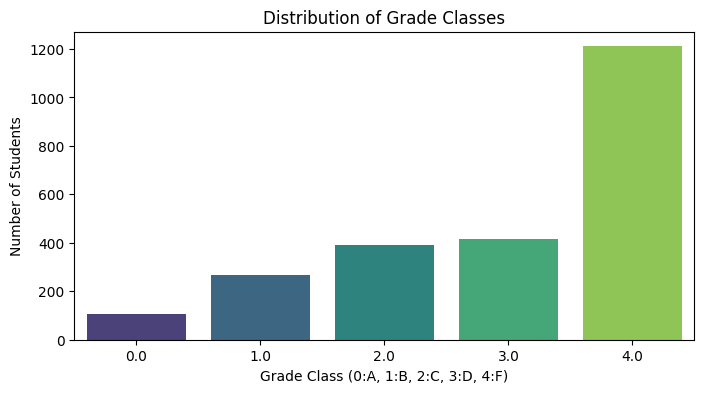

In [5]:
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='GradeClass', palette='viridis')
plt.title('Distribution of Grade Classes')
plt.xlabel('Grade Class (0:A, 1:B, 2:C, 3:D, 4:F)')
plt.ylabel('Number of Students')
plt.show()

C:\Users\thian\AppData\Local\Temp\ipykernel_20268\1763054953.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Gender', palette='pastel')


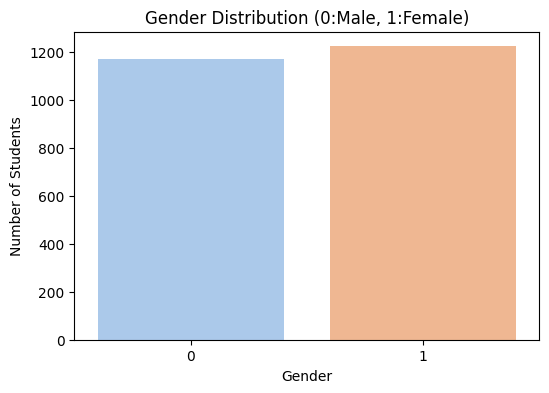

C:\Users\thian\AppData\Local\Temp\ipykernel_20268\1763054953.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Ethnicity', palette='Set2')


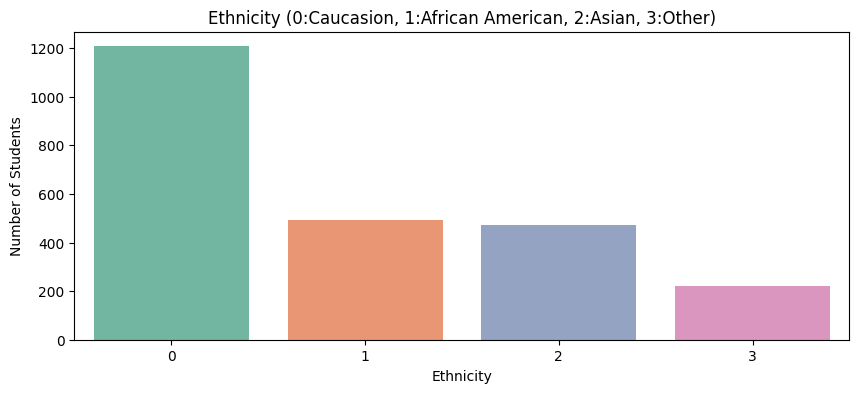

C:\Users\thian\AppData\Local\Temp\ipykernel_20268\1763054953.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ParentalEducation', palette='Set2')


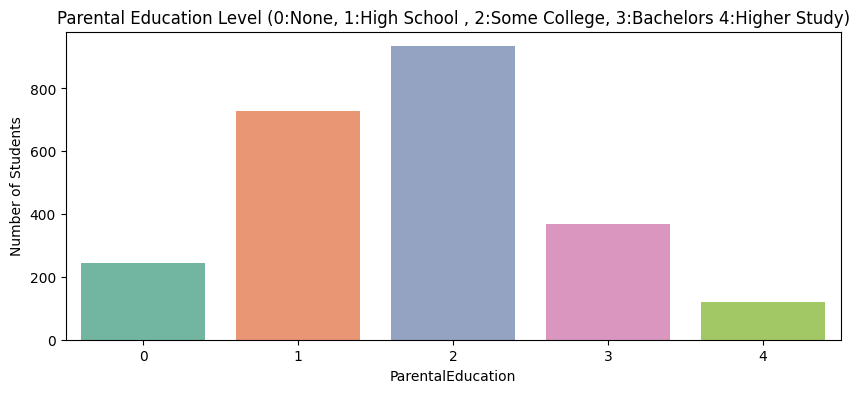

C:\Users\thian\AppData\Local\Temp\ipykernel_20268\1763054953.py:24: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Absences', palette='Set2')


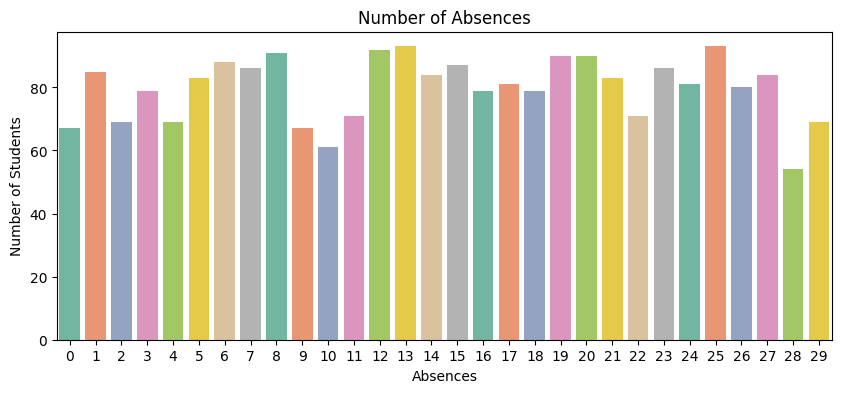

C:\Users\thian\AppData\Local\Temp\ipykernel_20268\1763054953.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='Tutoring', palette='Set2')


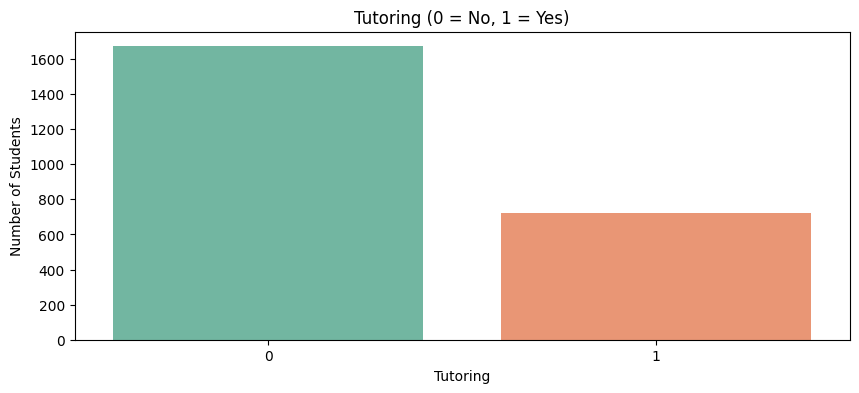

C:\Users\thian\AppData\Local\Temp\ipykernel_20268\1763054953.py:38: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x='ParentalSupport', palette='Set2')


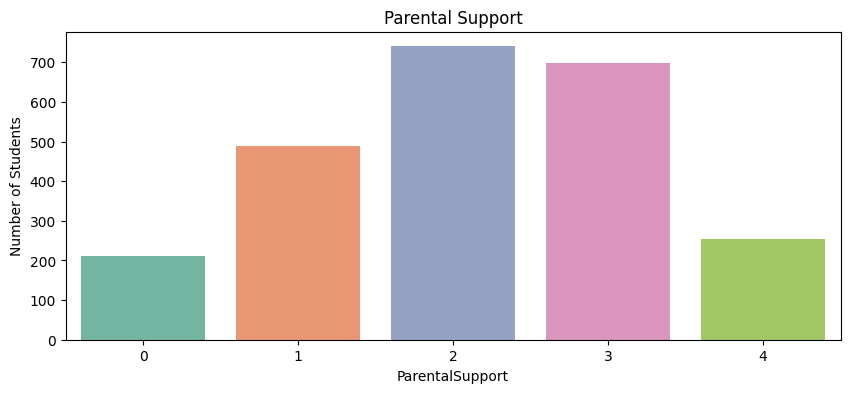

In [6]:
# Gender distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x='Gender', palette='pastel')
plt.title('Gender Distribution (0:Male, 1:Female)')
plt.ylabel('Number of Students')
plt.show()

# Ethnicity distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Ethnicity', palette='Set2')
plt.title('Ethnicity (0:Caucasion, 1:African American, 2:Asian, 3:Other)')
plt.ylabel('Number of Students')
plt.show()

# Parental Education distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='ParentalEducation', palette='Set2')
plt.title('Parental Education Level (0:None, 1:High School , 2:Some College, 3:Bachelors 4:Higher Study)')
plt.ylabel('Number of Students')
plt.show()

# Absences distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Absences', palette='Set2')
plt.title('Number of Absences')
plt.ylabel('Number of Students')
plt.show()

# Tutoring distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='Tutoring', palette='Set2')
plt.title('Tutoring (0 = No, 1 = Yes)')
plt.ylabel('Number of Students')
plt.show()

# Parental Support distribution
plt.figure(figsize=(10, 4))
sns.countplot(data=df, x='ParentalSupport', palette='Set2')
plt.title('Parental Support')
plt.ylabel('Number of Students')
plt.show()





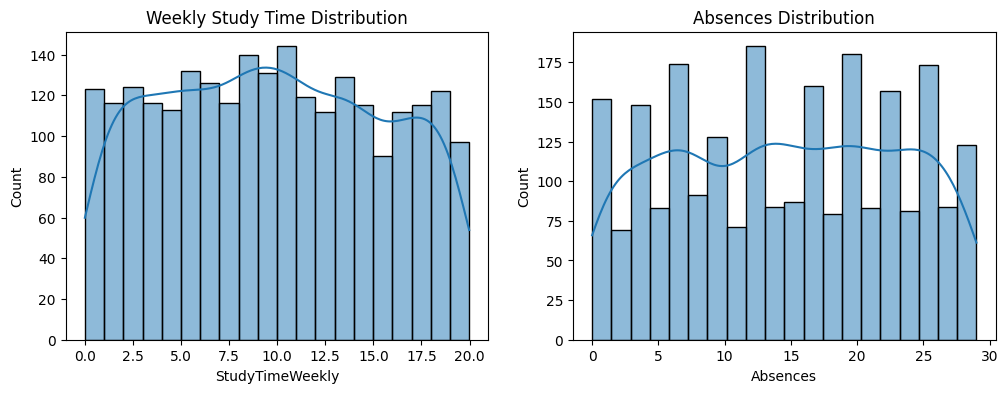

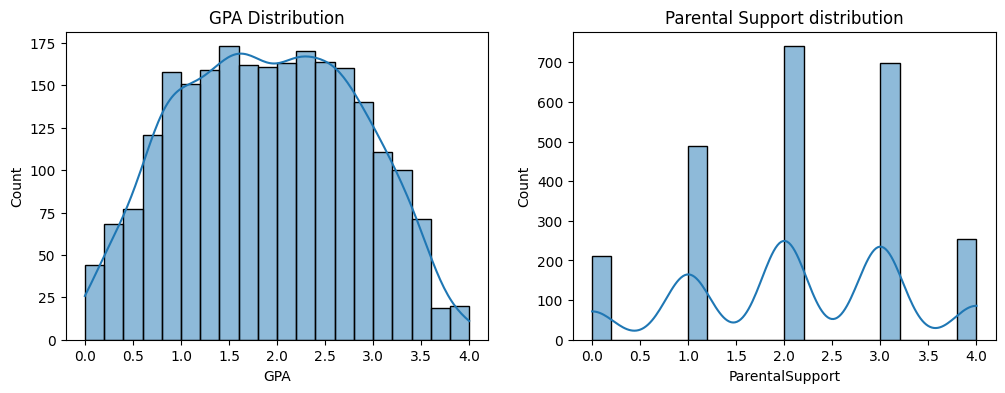

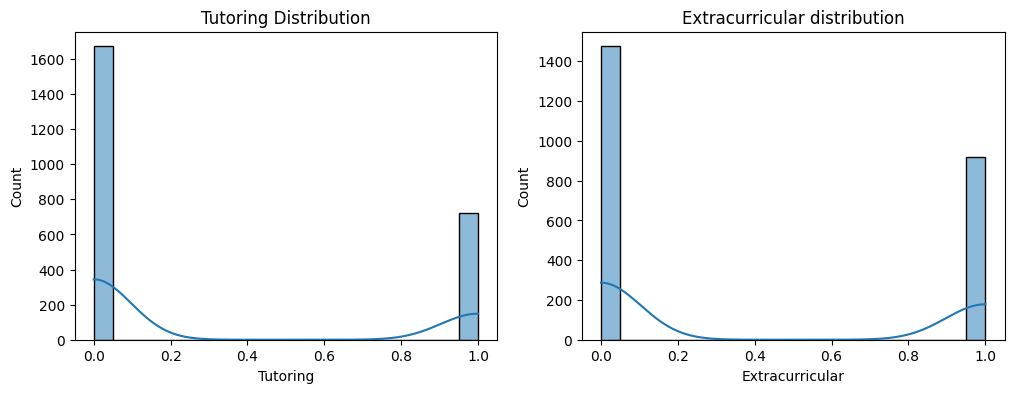

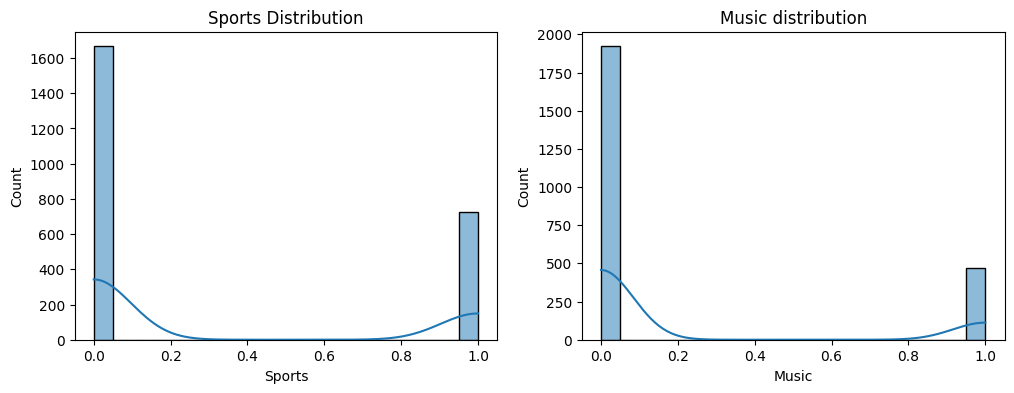

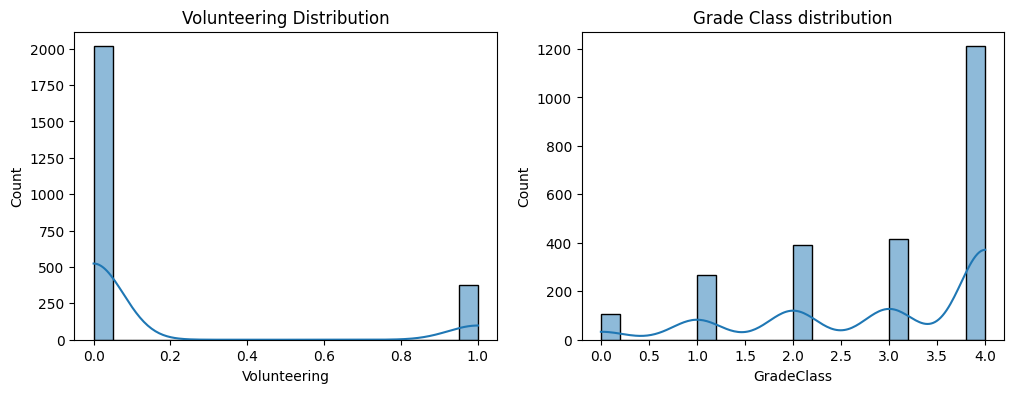

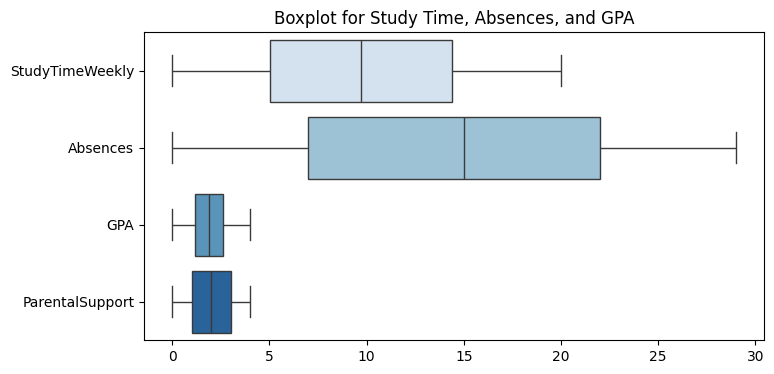

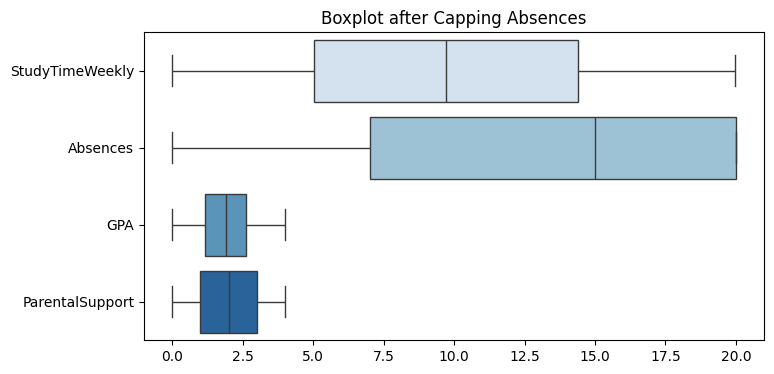

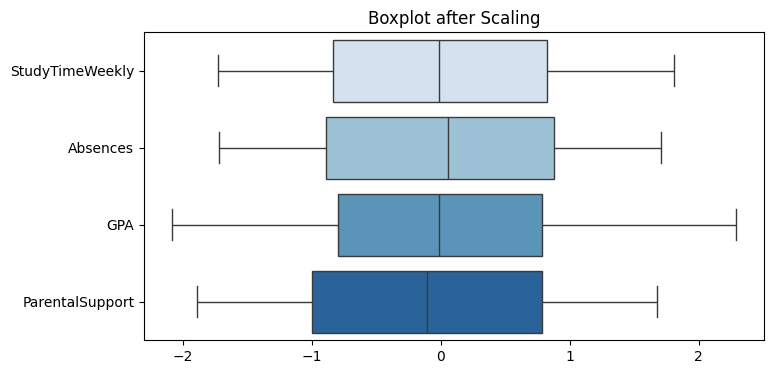

In [7]:
# StudyTime distributions
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['StudyTimeWeekly'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Weekly Study Time Distribution')

# Absences distribution
sns.histplot(df['Absences'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Absences Distribution')
plt.show()

# GPA distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['GPA'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('GPA Distribution')

# Parental Support distribution
sns.histplot(df['ParentalSupport'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Parental Support distribution')
plt.show()

# Tutoring distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Tutoring'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Tutoring Distribution')

# Extracurricular distribution
sns.histplot(df['Extracurricular'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Extracurricular distribution')
plt.show()

# Sports distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Sports'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Sports Distribution')

# Music distribution
sns.histplot(df['Music'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Music distribution')
plt.show()

# Volunteering distribution
fig, axes = plt.subplots(1, 2, figsize=(12, 4))
sns.histplot(df['Volunteering'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Volunteering Distribution')

# Grade Class distribution
sns.histplot(df['GradeClass'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Grade Class distribution')
plt.show()

#####

# Boxplot for outliers
plt.figure(figsize=(8, 4))
sns.boxplot(data=df[['StudyTimeWeekly', 'Absences', 'GPA', 'ParentalSupport']], palette='Blues', orient='h')
plt.title('Boxplot for Study Time, Absences, and GPA')
plt.show()

# Capping Absence Outliers
df_treated_abCap = df.copy()
absences_cap = df_treated_abCap['Absences'].quantile(0.70)
df_treated_abCap['Absences'] = np.where(df_treated_abCap['Absences'] > absences_cap, absences_cap, df_treated_abCap['Absences'])

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_treated_abCap[['StudyTimeWeekly', 'Absences', 'GPA','ParentalSupport']], palette='Blues', orient='h')
plt.title('Boxplot after Capping Absences')
plt.show()

# Standard Scaling for StudyTime, Absences, and GPA
scaling_columns = ['StudyTimeWeekly', 'Absences', 'GPA', 'ParentalSupport']
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[scaling_columns] = scaler.fit_transform(df[scaling_columns])

plt.figure(figsize=(8, 4))
sns.boxplot(data=df_scaled[['StudyTimeWeekly', 'Absences', 'GPA', 'ParentalSupport',]], palette='Blues', orient='h')
plt.title('Boxplot after Scaling')
plt.show()


## Bivariate

## a. Missing Value and Outlier Treatment
## b. Correlation Matrix
## c. Boxplots

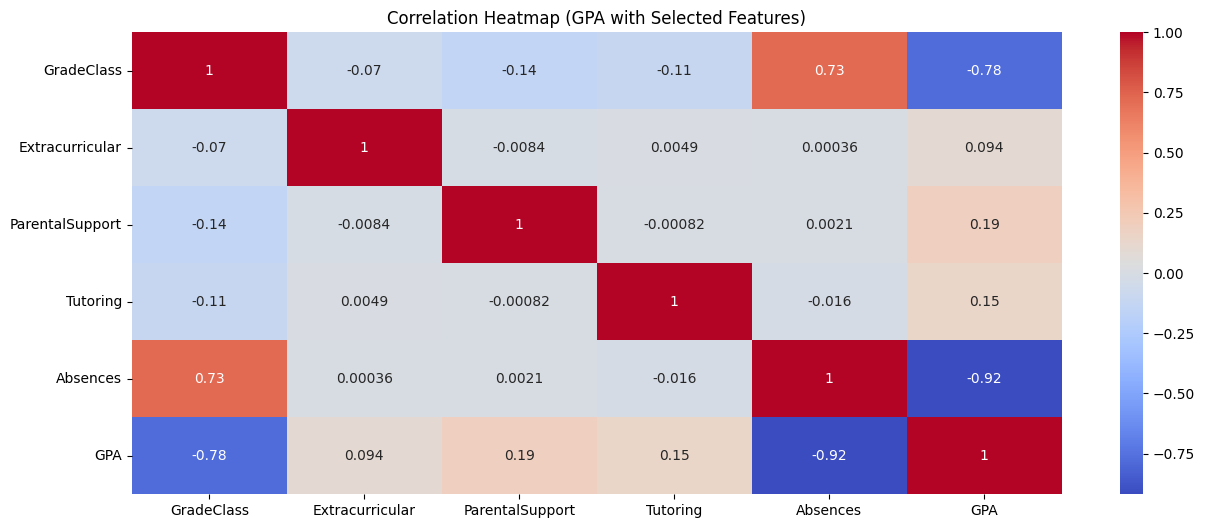

Missing values per column:
StudentID            0
Age                  0
Gender               0
Ethnicity            0
ParentalEducation    0
StudyTimeWeekly      0
Absences             0
Tutoring             0
ParentalSupport      0
Extracurricular      0
Sports               0
Music                0
Volunteering         0
GPA                  0
GradeClass           0
dtype: int64

📌 Selected Features Correlated with GPA


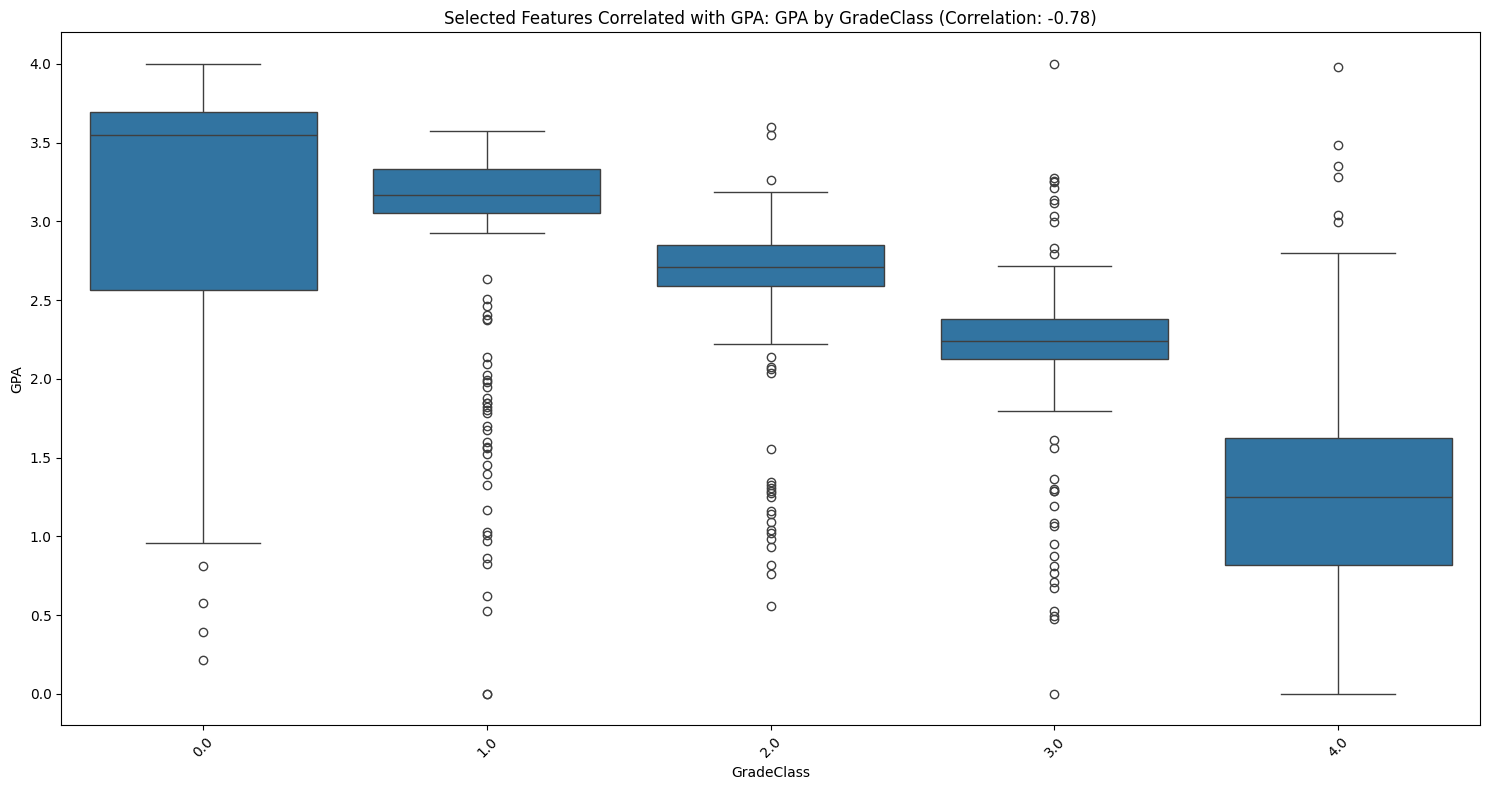

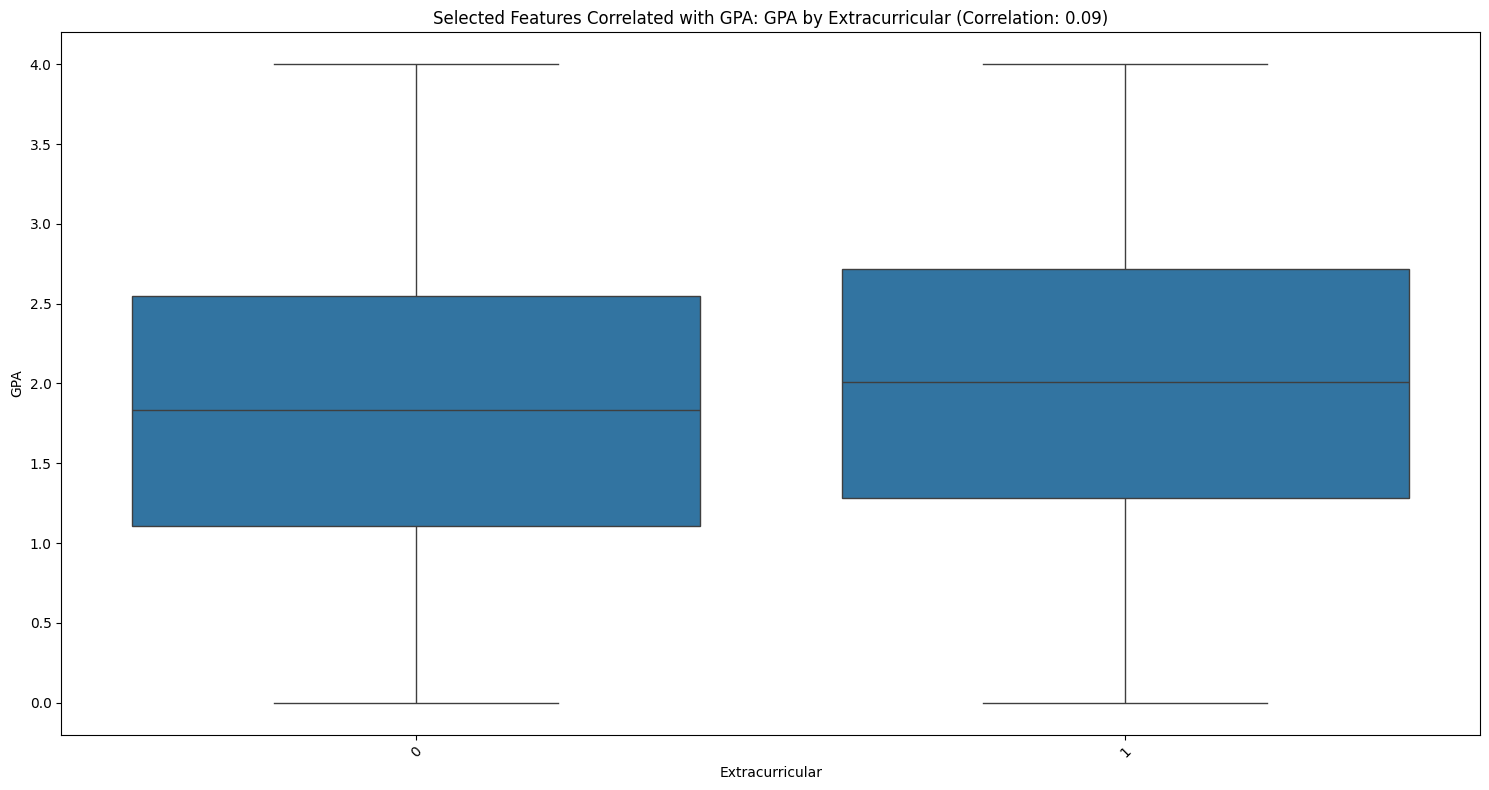

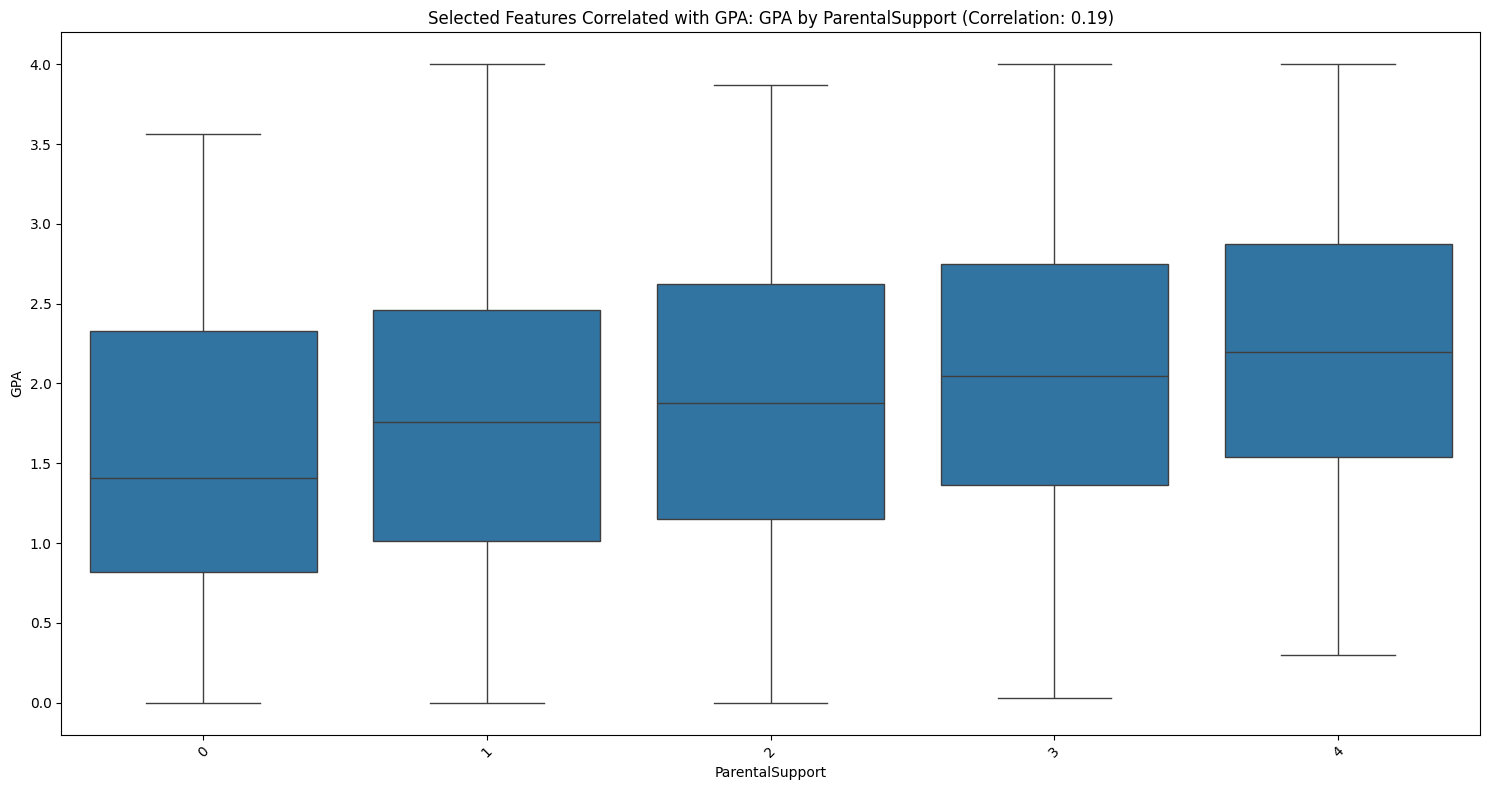

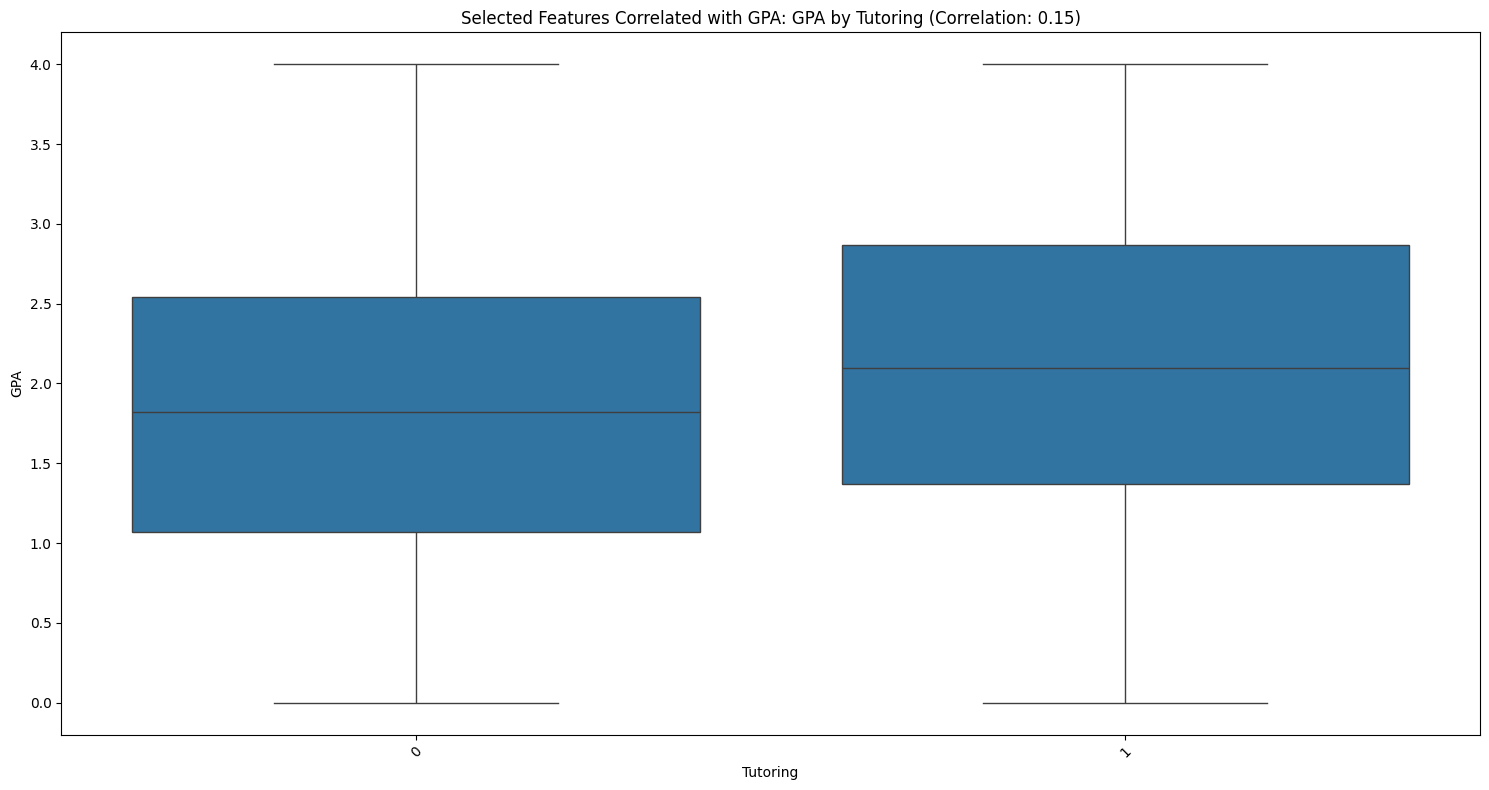

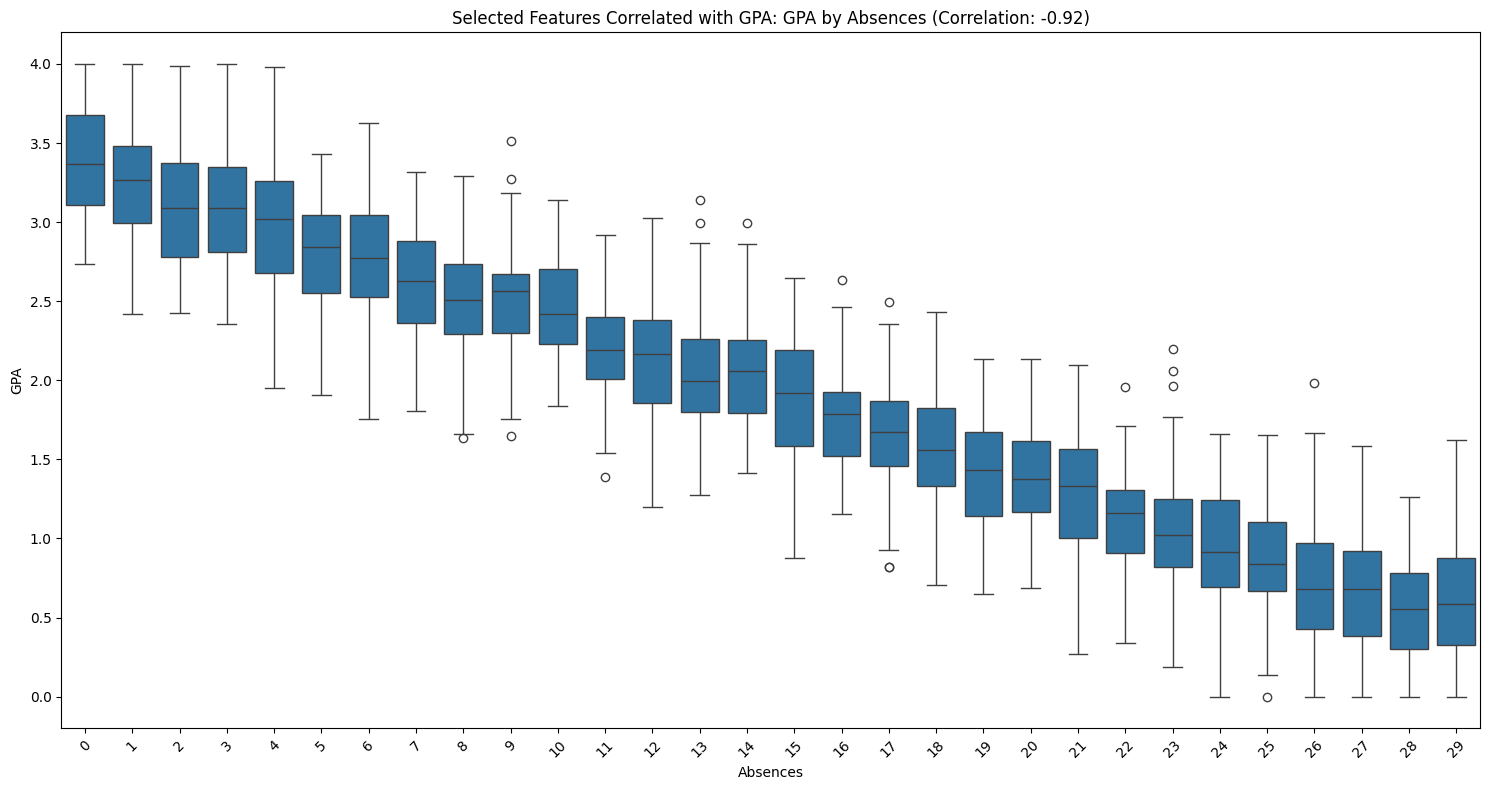

In [8]:
# Correlation heatmap for numeric features
#plt.figure(figsize=(15, 8))
#sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
#plt.title("Correlation Heatmap")
#plt.show()

# Correlation heatmap for specific features
selected_features = ['GradeClass', 'Extracurricular', 'ParentalSupport', 'Tutoring', 'Absences']
features_with_gpa = selected_features + ['GPA']  # Including GPA for correlation calculation

# Create the correlation matrix for the selected features
plt.figure(figsize=(15, 6))
sns.heatmap(df[features_with_gpa].corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap (GPA with Selected Features)")
plt.show()

# Correlations with GPA for the selected features
gpa_corr = df[features_with_gpa].corr(numeric_only=True)['GPA'].drop('GPA')

# Check for missing values
print("Missing values per column:")
print(df.isnull().sum())

# Handle missing values (if any)
df.fillna(df.median(numeric_only=True), inplace=True)

# Outlier treatment using IQR method on GPA
Q1 = df['GPA'].quantile(0.25)
Q3 = df['GPA'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

df = df[(df['GPA'] >= lower_bound) & (df['GPA'] <= upper_bound)]

# Function to plot boxplots for the selected features after removing outliers
def remove_outliers(df, feature):
    Q1 = df[feature].quantile(0.25)
    Q3 = df[feature].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[feature] >= lower_bound) & (df[feature] <= upper_bound)]

# Function to plot boxplots without outliers for specific features
def plot_boxplots_without_outliers(features, label):
    print(f"\n📌 {label}")
    for feature in features:
        # Remove outliers
        df_no_outliers = remove_outliers(df, feature)
        
        if df_no_outliers[feature].nunique() < 10:
            x = feature
            y = 'GPA'
        else:
            df_no_outliers['binned'] = pd.qcut(df_no_outliers[feature], q=4, duplicates='drop')
            x = feature
            y = 'GPA'

        plt.figure(figsize=(15, 8))
        sns.boxplot(x=df_no_outliers[x], y=df_no_outliers[y])
        plt.title(f'{label}: GPA by {feature} (Correlation: {gpa_corr[feature]:.2f})')
        plt.xticks(rotation=45)
        plt.tight_layout()
        plt.show()

        if 'binned' in df_no_outliers.columns:
            df_no_outliers.drop(columns=['binned'], inplace=True)

# Step 3: Plot the boxplots for the selected features without outliers
plot_boxplots_without_outliers(selected_features, "Selected Features Correlated with GPA")




## Feature Engineering

C:\Users\thian\AppData\Local\Temp\ipykernel_20268\30690305.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='TotalActivities', y='GPA', palette='viridis')


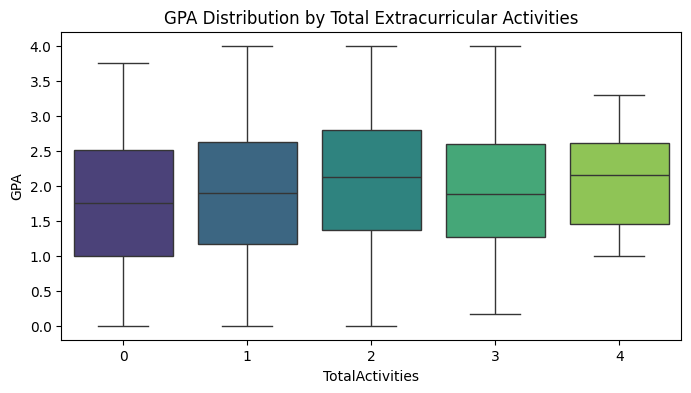

In [9]:
# Create a new feature
df['TotalActivities'] = df['Sports'] + df['Music'] + df['Volunteering'] + df['Extracurricular']

# Plot impact on GPA
plt.figure(figsize=(8, 4))
sns.boxplot(data=df, x='TotalActivities', y='GPA', palette='viridis')
plt.title('GPA Distribution by Total Extracurricular Activities')
plt.show()

## Model Building

In [10]:
#I have selected these features based on theid correlation with the target variable from the heatmap in test. I think it would be wise to add that heatmap to main.
features = ['ParentalEducation', 'StudyTimeWeekly', 'Absences', 'Tutoring', 'ParentalSupport', 'GPA']

target = 'GradeClass'

# Splitting the data into features and target variable for each dataframe I tested with the boxplots earlier so we can compare the results from the models.
X_unmodified = df[features]
y_unmodified = df[target]

x_capped = df_treated_abCap[features]
y_capped = df_treated_abCap[target]

X_scaled = df_scaled[features]
y_scaled = df_scaled[target]

# Splitting the data into training and testing sets for each dataframe. Using the same random state and size to ensure comparability.
X_train_unmodified, X_test_unmodified, y_train_unmodified, y_test_unmodified = train_test_split(X_unmodified, y_unmodified, test_size=0.2, random_state=90)
X_train_capped, X_test_capped, y_train_capped, y_test_capped = train_test_split(x_capped, y_capped, test_size=0.2, random_state=90)
X_train_scaled, X_test_scaled, y_train_scaled, y_test_scaled = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=90)

## a. Logistic regression model training

In [11]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
log_model = LogisticRegression(random_state=90)
log_model.fit(X_train_scaled, y_train_scaled)
log_scores = cross_val_score(log_model, X_scaled, y_scaled, cv = 5)
y_pred_log = log_model.predict(X_test_scaled)
print("Logistic Regression Accuracy:", accuracy_score(y_test_scaled, y_pred_log))
print("Logistic Regression CV score :" , log_scores.mean())

Logistic Regression Accuracy: 0.7933194154488518
Logistic Regression CV score : 0.8009844428333086


## b. Neural Network training

In [12]:
# Neural Network
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import cross_val_score
nn_model = MLPClassifier(hidden_layer_sizes=(100,), max_iter=500, random_state=90)
nn_model.fit(X_train_scaled, y_train_scaled)
nn_model_scores = cross_val_score(nn_model, X_scaled,y_scaled, cv=5)
y_pred_nn = nn_model.predict(X_test_scaled)
print("Neural Network Accuracy:", accuracy_score(y_test_scaled, y_pred_nn))
print("Neural Network CV score :" , nn_model_scores.mean())

c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(
c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the opti

Neural Network Accuracy: 0.8810020876826722
Neural Network CV score : 0.8870747110874294


c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (500) reached and the optimization hasn't converged yet.
  warnings.warn(


## c. XGBoost training

In [13]:
# XGBoost
#import XGBClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score

xgb_model = XGBClassifier(random_state=90, use_label_encoder=False, eval_metric='logloss')
xgb_model.fit(X_train_capped, y_train_capped)
xgb_scores = cross_val_score(xgb_model, x_capped, y_capped, cv=5)
y_pred_xgb = xgb_model.predict(X_test_capped)
print("XGBoost Accuracy:", accuracy_score(y_test_capped, y_pred_xgb))
print("XGBoost CV score :" , nn_model_scores.mean())

c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:04:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:04:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:04:35] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)
c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:04:35] WARNING: C:\actio

XGBoost Accuracy: 0.918580375782881
XGBoost CV score : 0.8870747110874294


c:\Users\thian\AppData\Local\Programs\Python\Python313\Lib\site-packages\xgboost\training.py:183: UserWarning: [09:04:36] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


## d. Random Forest training

In [14]:
# Random Forest
from sklearn.ensemble import RandomForestClassifier

rf_model = RandomForestClassifier(random_state=90)
rf_model.fit(X_train_unmodified, y_train_unmodified)
rf_scores = cross_val_score(rf_model, X_unmodified, y_unmodified, cv=5)
y_pred_rf = rf_model.predict(X_test_unmodified)
print("Random Forest Accuracy:", accuracy_score(y_test_unmodified, y_pred_rf))
print("Rando CV score :" , rf_scores.mean())

Random Forest Accuracy: 0.9227557411273486
Rando CV score : 0.9230212873751975


In [15]:
# Random Forest with GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, cross_val_score
from sklearn.metrics import accuracy_score

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],  # Number of trees
    'max_depth': [None, 10, 20, 30],  # Depth of the trees
    'min_samples_split': [2, 5, 10],  # Minimum samples to split an internal node
    'min_samples_leaf': [1, 2, 4]  # Minimum samples to be at a leaf node
}

# Initialize the RandomForest model
rf_model = RandomForestClassifier(random_state=90)

# Perform GridSearchCV to find the best parameters
grid_search = GridSearchCV(estimator=rf_model, param_grid=param_grid, cv=5, scoring='accuracy', n_jobs=-1)
grid_search.fit(X_train_unmodified, y_train_unmodified)

# Get the best parameters and best estimator
best_params = grid_search.best_params_
best_rf_model = grid_search.best_estimator_

# Cross-validation score with the best model
rf_scores = cross_val_score(best_rf_model, X_unmodified, y_unmodified, cv=5)

# Make predictions and evaluate
y_pred_rf = best_rf_model.predict(X_test_unmodified)
print("Best Parameters:", best_params)
print("Random Forest Accuracy:", accuracy_score(y_test_unmodified, y_pred_rf))
print("Random Forest CV Score:", rf_scores.mean())

Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 200}
Random Forest Accuracy: 0.9269311064718163
Random Forest CV Score: 0.9267808632000071


In [16]:
import joblib

# Save the best Random Forest model to a file
joblib.dump(best_rf_model, 'model.pkl')

print("Model saved as model.pkl")

Model saved as model.pkl
